In [60]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from datafunc import min_max_dimensions, dimensions_distributions
import pathlib
import pandas as pd
import seaborn as sns

In [2]:
datapath='../0. Project Data/Original Data'
org_data_dir = pathlib.Path(datapath).with_suffix('')
org_data_dir

WindowsPath('../0. Project Data/Original Data')

#### Checking minimum and maximum image dimensions

In [3]:
dims = min_max_dimensions(org_data_dir)
print( 'max dimensions', dims[0])
print( 'min dimensions', dims[1])

max dimensions (5184, 5184)
min dimensions (180, 116)


#### Checking distribution of image height and image width

In [4]:
widths, heights = dimensions_distributions(org_data_dir)

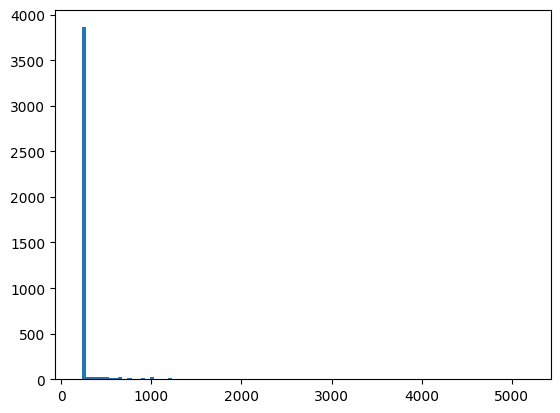

In [9]:
plt.hist(widths, bins = 100);

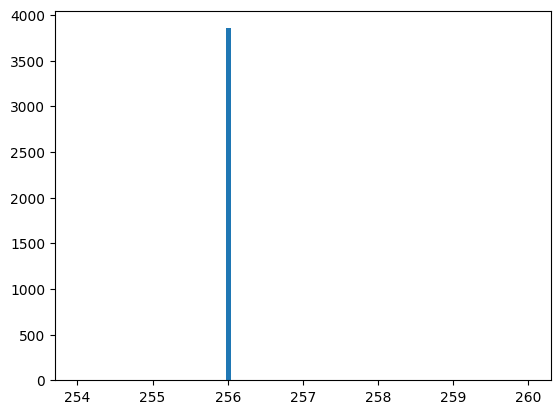

In [15]:
plt.hist(widths, bins = 100, range = (254,260));

In [39]:
Width_series= pd.Series(widths, name = 'width')
Width_series.value_counts(ascending=False).head(20)

width
256     3853
1024      17
400       17
432       14
1200      13
300       11
675        8
1500       7
640        7
3264       7
600        6
900        6
500        6
350        5
480        5
750        5
1000       5
2592       4
450        4
960        4
Name: count, dtype: int64

In [25]:
(Width_series <= 256).mean()

0.9228748806112703

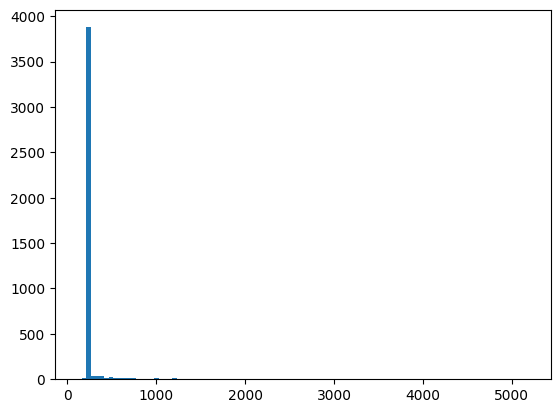

In [26]:
plt.hist(heights, bins = 100);

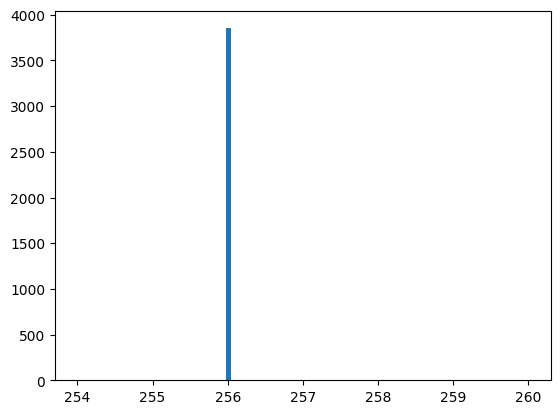

In [30]:
plt.hist(heights, bins = 100, range = (254,260));

In [40]:
Height_series= pd.Series(heights, name='height')
Height_series.value_counts(ascending=False).head(20)

height
256     3852
1200      14
350       10
2448       8
768        8
300        8
400        6
1600       5
480        5
900        5
1024       5
200        5
320        4
1125       4
3456       4
540        4
324        3
482        3
1536       3
335        3
Name: count, dtype: int64

In [51]:
(Height_series <= 256).mean()

0.9266953199617957

#### How many images are square?

In [58]:
df=pd.concat([Width_series,Height_series],axis=1)
df['square']= [1 if row[0]==row[1]  else 0 for index, row in df.iterrows()]
df['height & width 256']= [1 if row[0]==256 and row[1] == 256 else 0 for index, row in df.iterrows()]
df

,width,height,square,height & width 256
0,1000,585,0,0
1,788,371,0,0
2,641,482,0,0
3,300,200,0,0
4,256,256,1,1
...,...,...,...,...
4183,256,256,1,1
4184,256,256,1,1
4185,256,256,1,1
4186,256,256,1,1


In [50]:
df.square.mean()

0.9214422158548233

In [59]:
df['height & width 256'].mean()

0.9197707736389685

In [65]:
#check img hieght/ width dists

In [70]:
df_sub=df[df['height & width 256']==0]

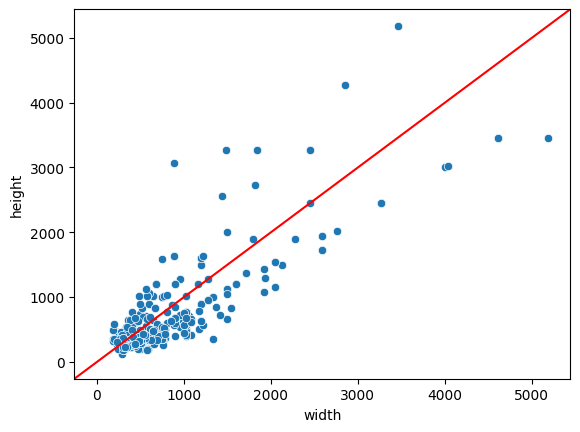

In [71]:
sns.scatterplot(data=df_sub, x='width', y= 'height')
plt.axline([0, 0], [1, 1], color='red');
plt.show()

conclusion: most images are square and have dimensions 256 x 256